<a href="https://colab.research.google.com/github/nkiru-ede/nkiru_codes/blob/master/News_Article_Analysis_and_Topic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install twython

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#import important libraries
import pprint
import requests
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import os.path
from gensim import corpora
from gensim.models import LsiModel, LdaModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from gensim.models.coherencemodel import CoherenceModel
import nltk
import numpy as np
from gensim.test.utils import common_corpus, common_dictionary
import re

In [ ]:
#Spool news info with news api credentials
secret = "b770f2b8f56c4f648eac0af08dacf757"
url_everything = "https://newsapi.org/v2/everything?"
parameters_everything ={
    'q': 'Neil Parish',
    'pagesize': 7,
    'apikey': secret
}


[(0, '0.305*"parish" + 0.302*"say" + 0.297*"mp" + 0.237*"whip" + 0.189*"commons" + 0.166*"parliament" + 0.153*"tory" + 0.153*"conservative" + 0.149*"would" + 0.143*"mps"'), (1, '-0.313*"seat" + -0.234*"hold" + -0.178*"labour" + 0.164*"whip" + -0.151*"byelection" + 0.144*"say" + -0.141*"conservatives" + -0.141*"one" + -0.135*"vote" + -0.135*"resignation"'), (2, '0.491*"neil" + 0.171*"political" + 0.170*"seem" + 0.166*"show" + 0.144*"rees" + 0.139*"mogg" + 0.122*"week" + 0.104*"network" + 0.104*"channel" + 0.104*"presenter"'), (3, '-0.280*"sexual" + -0.248*"mps" + -0.196*"male" + -0.186*"behaviour" + -0.135*"harassment" + -0.133*"use" + -0.132*"parliament" + 0.127*"say" + -0.125*"report" + -0.116*"ms"'), (4, '-0.284*"conservative" + -0.234*"member" + -0.218*"parish" + 0.205*"mps" + 0.180*"whip" + -0.170*"say" + -0.163*"watch" + 0.163*"mp" + -0.148*"bbc" + -0.142*"admit"'), (5, '-0.201*"bad" + 0.175*"mp" + -0.158*"school" + 0.148*"sexual" + -0.138*"mps" + 0.123*"ms" + -0.121*"whole" + -0.

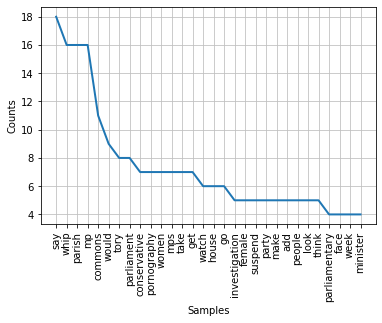

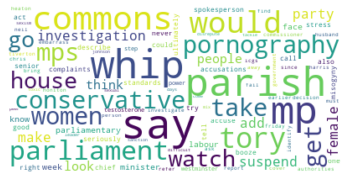

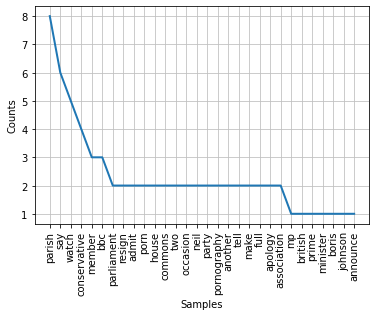

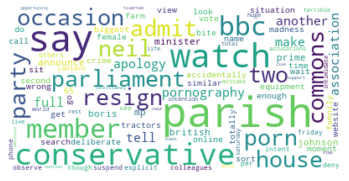

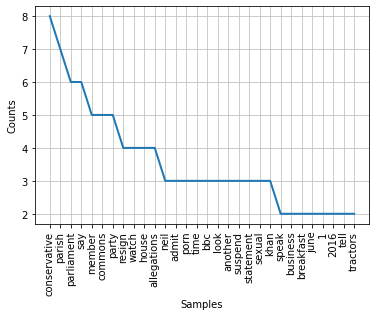

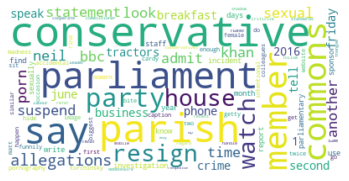

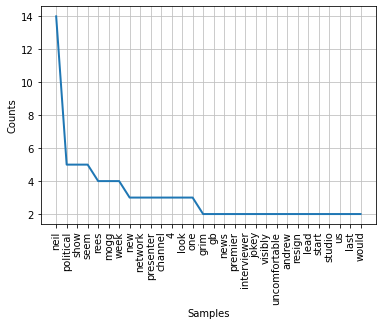

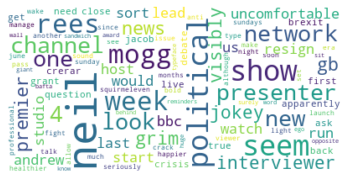

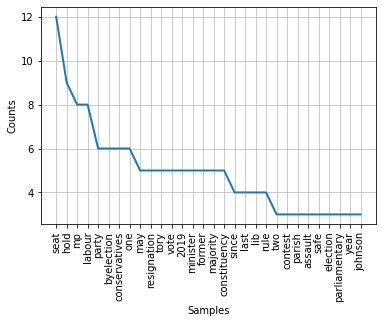

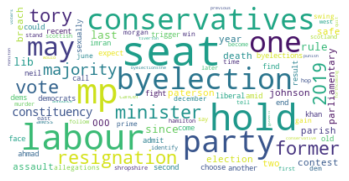

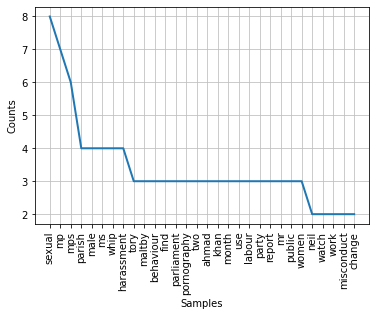

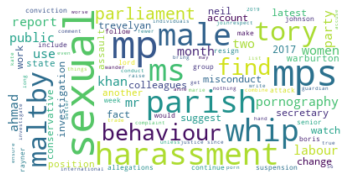

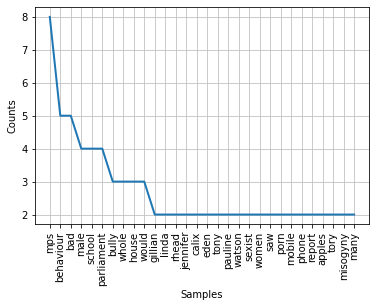

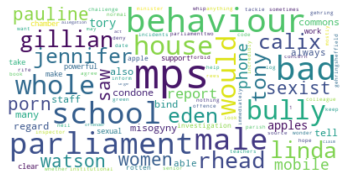

 MP Neil Parish, a member of British Prime Minister Boris Johnson's Conservative Party, announced he will resign on BBC, saying he accidentally viewed pornography while searching for farming equipment online. And I watched it for a bit which I shouldn't have done," Parish, 65, told BBC. And that was deliberate," Parish said, calling it a "moment of madness" that was "totally wrong." Two female colleagues said they observed Parish watching porn on his phone, per BBC, though Parish denied watching the explicit content with the intent of others seeing it. I made a huge terrible mistake and I'm here to tell the world," Parish said. "On Saturday, Parish's constituency, the Tiverton & Honiton Conservative Association, said it supports "his decision to step down as our Member of Parliament." "We would like to take this opportunity to thank Neil Parish for his service to our communities over the past twelve years," the association said in a statement.


In [ ]:
#News aritcle and topic analysis
response_everything = requests.get(url_everything, params = parameters_everything)

response_json_everything = response_everything.json()

response_dict = {'author':[], 'source name':[], 'title':[], 'description':[], 'url':[], 'content':[], 'published':[]}

for status in response_json_everything['articles']:
    response_dict['author'].append(status['author'])
    response_dict['source name'].append(status['source']['name'])
    response_dict['title'].append(status['title'])
    response_dict['description'].append(status['description'])
    response_dict['url'].append(status['url'])
    response_dict['content'].append(status['content'])
    response_dict['published'].append(status['publishedAt'])
    
df = pd.DataFrame(response_dict)

df.to_csv("Neil Parish.csv")

def preprocess(doc_set):
    en_stop = set(stopwords.words('english'))
    lemma = WordNetLemmatizer()
    texts = []
    for i in doc_set:
        raw = i.lower()
        raw = re.sub(r"[^a-zA-Z0-9]+"," ", raw)
        tokens = nltk.word_tokenize(raw)
        stopped_tokens = [i for i in tokens if not i in en_stop]
        lemma_tokens = [lemma.lemmatize(i,pos=wordnet.VERB) for i in stopped_tokens]
        texts.append(lemma_tokens)
    return texts

def prepare_corpus(doc_clean):
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    
    return dictionary, doc_term_matrix

def lsa_model(doc_clean, numberoftopic, words):
    dictionary, doc_term_matrix = prepare_corpus(doc_clean)
    lsamodel = LsiModel(doc_term_matrix, num_topics = numberoftopic, id2word = dictionary)
    print(lsamodel.print_topics(num_topics=numberoftopic, num_words = words))

    cm = CoherenceModel(model=lsamodel, corpus=doc_term_matrix, coherence='u_mass')
    coherence = cm.get_coherence()  # get coherence value
    print(coherence)
    
    return lsamodel

def visualiser(data):
    fdist = nltk.FreqDist()
    for i in data:
       fdist[i] +=1
        
    fdist.plot(30, cumulative=False)
    
    wordcloud = WordCloud(max_font_size=50, max_words = 100, background_color="white").generate_from_frequencies(fdist)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

df = pd.read_csv("Neil Parish.csv")

number_of_topics = 7
words = 10

#Extracting the content from each article
content_clean = []
for i in df['url']:
    response = requests.get(url=i)
    page_content = response.text
    soup = BeautifulSoup(page_content, "html.parser")
    text = ''
    for j in soup.find_all("p"):
        text += j.get_text()
    content_clean.append(text)



#Performing data pre-proccessing and LSA modelling
text_pre = preprocess(content_clean)
model = lsa_model(text_pre, number_of_topics, words)
    
#Visualization of Word Frequency distribution and Word Cloud
for i in text_pre:
  visualiser(i)


#find the number of sentence in each article
sent =[]
for i in content_clean:
    sent.append(nltk.sent_tokenize(i))

#Summarrize the article
en_stop = set(stopwords.words('english'))
text = content_clean[1]
word_text =  nltk.word_tokenize(text)
freqTable = dict()
for i in word_text:
    i = i.lower()
    if i in en_stop:
        continue
    if i in freqTable:
        freqTable[i] += 1
    else:
        freqTable[i] = 1
sent_text = nltk.sent_tokenize(text)
sent_value = dict()

for i in sent_text:
    for word, freq in freqTable.items():
        if word in i.lower():
            if i in sent_value:
                sent_value[i] += freq
            else:
                sent_value[i] = freq
sumVal = 0
for i in sent_value:
    sumVal += sent_value[i]

avg = int(sumVal/len(sent_value))

summary = ''
for i in sent_text:
    if (i in sent_value) and (sent_value[i] > (1.2 * avg)):
        summary += " " + i
print(summary)
    
 
countwords = list(zip(content_clean, sent))
countwords = pd.DataFrame(countwords, columns=["Text", "SentToken"])